In [1]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
import tensorflow as tf

In [30]:
class_description = "Beer"
n = 100

In [2]:
base_path = os.path.abspath("./")
images_boxable_fname = 'train-images-boxable.csv'
annotations_bbox_fname = 'train-annotations-bbox.csv'
class_descriptions_fname = 'class-descriptions-boxable.csv'

In [3]:
base_path

'/Users/stivendeleur/dev/401-Senior-Project/OIDv6-Loader'

In [4]:
images_boxable = pd.read_csv(os.path.join(base_path, images_boxable_fname))
images_boxable.head()

,image_name,image_url
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...
3,ed600d57fcee4f94.jpg,https://requestor-proxy.figure-eight.com/figur...
4,ff47e649b23f446d.jpg,https://requestor-proxy.figure-eight.com/figur...


In [5]:
annotations_bbox = pd.read_csv(os.path.join(base_path, annotations_bbox_fname))
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [6]:
class_descriptions = pd.read_csv(os.path.join(base_path, class_descriptions_fname))
class_descriptions.head()

,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [7]:
print('length of the images_boxable: %d' %(len(images_boxable)) )
print('First image in images_boxable👇')
img_name = images_boxable['image_name'][0]
img_url = images_boxable['image_url'][0]
print('\t image_name: %s' % (img_name))
print('\t img_url: %s' % (img_url))
print('')
print('length of the annotations_bbox: %d' %(len(annotations_bbox)))
print('The number of bounding boxes are larger than number of images.')
print('')
print('length of the class_descriptions: %d' % (len(class_descriptions)-1))
img = io.imread(img_url)

length of the images_boxable: 1743042
First image in images_boxable👇
	 image_name: e39871fd9fd74f55.jpg
	 img_url: https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/e39871fd9fd74f55.jpg

length of the annotations_bbox: 14610229
The number of bounding boxes are larger than number of images.

length of the class_descriptions: 600


(1024, 768, 3)


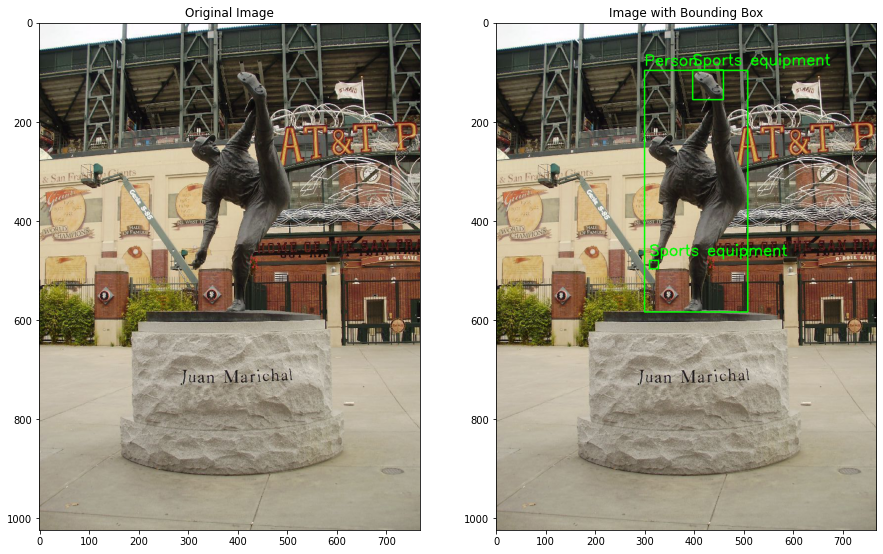

In [8]:
height, width, _ = img.shape
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_id = img_name[:16]
bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
img_bbox = img.copy()
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    class_series = class_descriptions[class_descriptions['name']==label_name]
    class_name = class_series['class'].values[0]
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)
plt.show()

In [31]:
object_pd = class_descriptions[class_descriptions['class']==class_description]

label_name = object_pd['name'].values[0]

In [10]:
bbox = annotations_bbox[annotations_bbox['LabelName']==label_name]

In [11]:
print('There are %d objects in the dataset' %(len(bbox)))
img_id = bbox['ImageID']

There are 9565 objects in the dataset


In [12]:
img_id = np.unique(img_id)
print('There are %d images which contain object' % (len(img_id)))

There are 4661 images which contain object


In [13]:
copy_id = img_id.copy()
random.seed(1)
random.shuffle(copy_id)

sub_img_id = copy_id[:n]

In [14]:
# This might takes a while to search all these urls
sub_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg'] for name in sub_img_id]

In [15]:
sub_pd = pd.DataFrame()
for i in range(len(sub_img_url)):
    sub_pd = sub_pd.append(sub_img_url[i], ignore_index = True)
sub_pd.to_csv(os.path.join(base_path, 'sub_img_url.csv'))

In [16]:
sub_img_url = [url['image_url'].values[0] for url in sub_img_url]

In [17]:
sub_pd

,image_name,image_url
0,8687d6d5220fea49.jpg,https://requestor-proxy.figure-eight.com/figur...
1,0bd062d9cdd6b4a8.jpg,https://requestor-proxy.figure-eight.com/figur...
2,c0aa7a7421cdb885.jpg,https://requestor-proxy.figure-eight.com/figur...
3,15938358c54f4edb.jpg,https://requestor-proxy.figure-eight.com/figur...
4,f485b36612d578a6.jpg,https://requestor-proxy.figure-eight.com/figur...
...,...,...
95,e1acfbb979b1bad8.jpg,https://requestor-proxy.figure-eight.com/figur...
96,8f6279d557cd2790.jpg,https://requestor-proxy.figure-eight.com/figur...
97,5851e4acb964bc18.jpg,https://requestor-proxy.figure-eight.com/figur...
98,0c600d3aed8343db.jpg,https://requestor-proxy.figure-eight.com/figur...


In [20]:
sub_pd = pd.read_csv(os.path.join(base_path, 'sub_img_url.csv'))
sub_img_url = sub_pd['image_url'].values

In [24]:
# Create the directory
images_dir = os.path.join(base_path,class_description)
if not os.path.isdir(images_dir):
    os.mkdir(images_dir)
for url in sub_img_url:
    img = io.imread(url)
    saved_path = os.path.join(images_dir, url[-20:])
    io.imsave(saved_path, img)

In [27]:
# Save images to train and test directory
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
if not os.path.isdir(train_path):
    os.mkdir(train_path)
if not os.path.isdir(test_path):
    os.mkdir(test_path)

all_imgs = os.listdir(images_dir)
all_imgs = [f for f in all_imgs if not f.startswith('.')]
random.seed(1)
random.shuffle(all_imgs)

train_imgs = all_imgs[:int(n*.8)]
test_imgs = all_imgs[int(n*.8):]

# Copy each classes' images to train directory
for j in range(len(train_imgs)):
    original_path = os.path.join(images_dir, train_imgs[j])
    new_path = os.path.join(train_path, train_imgs[j])
    copyfile(original_path, new_path)

# Copy each classes' images to test directory
for j in range(len(test_imgs)):
    original_path = os.path.join(images_dir, test_imgs[j])
    new_path = os.path.join(test_path, test_imgs[j])
    copyfile(original_path, new_path)


In [32]:
train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        if labelName == label_name:
            train_df = train_df.append({'FileName': img_name, 
                                        'XMin': row['XMin'], 
                                        'XMax': row['XMax'], 
                                        'YMin': row['YMin'], 
                                        'YMax': row['YMax'], 
                                        'ClassName': class_description}, 
                                       ignore_index=True)

In [34]:
test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        if labelName == label_name:
            test_df = test_df.append({'FileName': img_name, 
                                        'XMin': row['XMin'], 
                                        'XMax': row['XMax'], 
                                        'YMin': row['YMin'], 
                                        'YMax': row['YMax'], 
                                        'ClassName': class_description}, 
                                       ignore_index=True)

In [35]:
train_df.to_csv(os.path.join(base_path, 'train.csv'))
test_df.to_csv(os.path.join(base_path, 'test.csv'))

In [36]:
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# For training
f= open(base_path + "/annotation.txt","w+")
for idx, row in train_df.iterrows():
    file_path = os.path.join(base_path, "train", row['FileName'])
    img = cv2.imread(file_path)
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    className = row['ClassName']
    f.write(file_path + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()

In [38]:
test_df = pd.read_csv(os.path.join(base_path, 'test.csv'))

# For training
f= open(base_path + "/test_annotation.txt","w+")
for idx, row in test_df.iterrows():
    file_path = os.path.join(base_path, "test", row['FileName'])
    img = cv2.imread(file_path)
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    className = row['ClassName']
    f.write(file_path + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()